## comparative plotter for different models

In [1]:
%reset
import xarray as xr
import time
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import breakdown_maker as bm
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
#define models here, as well as some descriptions and 
#are we calculating the breakdowns?

breakhorse = True

tms_te = ['TOM12_TJ_1AS6','TOM12_TJ_1BS2']
tms = ['TOM12_TJ_1AS6','TOM12_TJ_1BS2', 'TOM12_TJ_3AS1','TOM12_DW_WE43', 'TOM12_DW_GA01']
tms_te = tms
#descriptions
descs = ['1AS6: TJ, Met Office, Hist. ozone, \n SSP 1-2.6, restart from WE43 in 1948',\
         '1BS2: TJ, Met Office, Hist. ozone, \n SSP 3-7.0, restart from WE43 in 1948',\
         '3AS1: TJ, Met Office, Ozone-1990, \n SSP 1-2.6, restart from WE43 in 1948',\
         'DW_WE43: Dave, ERA5',
         'DW_GA01: Dave, GCB run, NCEP']
#colours
cols = [sc.scen['1A']['color'],sc.scen['1B']['color'],sc.scen['3A']['color'], 'grey', 'b']

In [3]:
if breakhorse:
    
    for tm in tms_te:
        bm.breakdown_maker(tm, fmi = 1948)

BEEP BOOP RUNNING SUMMARY PROTOCOL ON MODEL TOM12_TJ_1AS6
analyzing years 1948-2044
producing summary stats SUMMARY_TOM12_TJ_1AS6_1948-2044.nc
for storage in /gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/CUSTOM_BD/
compute complete, time taken (s): 130.346684217453
BEEP BOOP RUNNING SUMMARY PROTOCOL ON MODEL TOM12_TJ_1BS2
analyzing years 1948-1976
producing summary stats SUMMARY_TOM12_TJ_1BS2_1948-1976.nc
for storage in /gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/CUSTOM_BD/
compute complete, time taken (s): 36.39054036140442


## load summary stats

In [4]:
sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/CUSTOM_BD/'

dsets = []

for tm in tms:
    w = glob.glob(f'{sdir}*{tm}*')
    ds = xr.open_dataset(w[0])
    dsets.append(ds)

## model based atmospheric pco2

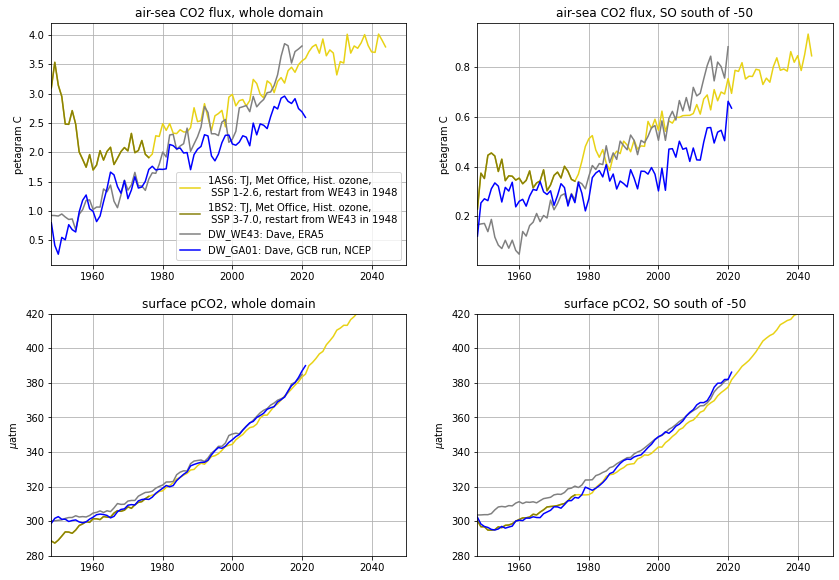

In [6]:
tend = 2050; tendatm = 420
fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

### cflx total
for i in range(0,len(dsets)):
    ds = dsets[i]; col = cols[i]
    axs[0].plot(ds.yrs, ds.cflx, color = col, label = descs[i])
    axs[1].plot(ds.yrs, ds.cflx_so, color = col)
    axs[2].plot(ds.yrs, ds.pco2, color = col)
    axs[3].plot(ds.yrs, ds.pco2_so, color = col)

tits = ['air-sea CO2 flux, whole domain', 'air-sea CO2 flux, SO south of -50',\
        'surface pCO2, whole domain', 'surface pCO2, SO south of -50']
ylabs = ['petagram C', 'petagram C', '$\mu$atm', '$\mu$atm']
for i in range(0,4):
    axs[i].grid()
    axs[i].set_xlim(1948,tend)
    axs[i].set_title(tits[i])
    axs[i].set_ylabel(ylabs[i])
    if i >1:
        axs[i].set_ylim([280,tendatm])
        
axs[0].legend()